# UK Prime Minister Rishi Sunak Twitter Sentiment

## 1. Defining the Question

* To check Twitter Reaction to Rishi Sunak being elected as PM.
* To Perform Sentimental Analysis can be performed on this dataset.
* To model the data and predict the sentiment of the tweets.

## 2. Understanding the context

Rishi Sunak lost to Liz Truss in September, but she resigned six weeks later. In the latest leadership contest, Mr Sunak racked up the support of his fellow MPs early, and fast. He crossed the 100 nominations he needed long before the deadline - including from MPs that had previously backed Truss or Boris Johnson.

## 3. Data Relevance

The data was collected from Twitter Hashtags: #rishisunak, #rishisunakPM , Rishi Sunak. It consists of 113578 tweets. The link to the dataset is [here](https://www.kaggle.com/datasets/tejasurya/latest-elected-uk-prime-minister-rishi-sunak).


## 4. Importing Libraries and Loading the Dataset

In [122]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image,ImageFont
from sklearn.feature_extraction.text  import CountVectorizer
import collections
import warnings
warnings.filterwarnings("ignore")
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
import collections 

In [83]:
# Loading the dataset

df = pd.read_csv("uk_pm.csv")

## 5. Assessing the Data

In [84]:
# Checking the  top 5 rows of the dataset

df.head()

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,NaN,1.584541e+18,https://twitter.com/BritIndianVoice,@BritIndianVoice @RishiSunak #RishiSunak is #B...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,NaN,NaN,NaN,#RishiSunak is the richest Tory MP in history....
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,NaN,NaN,NaN,#RishiSunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,NaN,NaN,NaN,A mountain full of money and a knowledge of pr...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,NaN,1.584546e+18,https://twitter.com/trussliz,@trussliz @RishiSunak Chance was been given as...


In [85]:
# Checking the bottom 5 rows of the dataset

df.tail()

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
113573,1584553348736421888,@JackBarbour_ @piersmorgan @RishiSunak The man...,aqeelone22,NaN,2022-10-24 14:32:12+00:00,1162,0,0,0,0,en,NaN,1.584532e+18,https://twitter.com/JackBarbour_,@JackBarbour_ @piersmorgan @RishiSunak The man...
113574,1584553348677525505,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,EddieThornley,NaN,2022-10-24 14:32:12+00:00,97,0,0,0,0,en,NaN,1.584539e+18,https://twitter.com/Jacob_Rees_Mogg,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...
113575,1584553348597895168,@sajidjavid @RishiSunak Desperate call for a d...,pedleysjohn,['ToriesUnfitToGovern'],2022-10-24 14:32:12+00:00,2484,0,0,0,0,en,NaN,1.584401e+18,https://twitter.com/sajidjavid,@sajidjavid @RishiSunak Desperate call for a d...
113576,1584553348132397056,@SkyNews Rulling Party needs a strong oppositi...,KarobiVC,NaN,2022-10-24 14:32:12+00:00,392,0,0,0,0,en,NaN,1.584512e+18,https://twitter.com/SkyNews,@SkyNews Rulling Party needs a strong oppositi...
113577,1584553347998105600,@trussliz @RishiSunak Liz Truss has won the ma...,sands_hill,NaN,2022-10-24 14:32:12+00:00,4,0,0,0,0,en,NaN,1.584546e+18,https://twitter.com/trussliz,@trussliz @RishiSunak Liz Truss has won the ma...


In [86]:
# Checking the shape of the dataset

print("The dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset contains 113578 rows and 15 columns


In [87]:
# Checking the columns of the dataset

df.columns

Index(['id', 'text', 'username', 'hashtags', 'created_at',
       'user followers count', 'replycount', 'retweetcount', 'likecount',
       'quotecount', 'language', 'quotedtweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers'],
      dtype='object')

In [88]:
# Checking for cardinality

# Number of unique values in each column

print("Cardinality of the columns in the dataset are as follows:\n")
for i in df.columns:
    print(f'{i:<5}: {df[i].nunique()}')
    

Cardinality of the columns in the dataset are as follows:

id   : 113578
text : 111363
username: 76977
hashtags: 11372
created_at: 40084
user followers count: 8779
replycount: 194
retweetcount: 280
likecount: 597
quotecount: 88
language: 59
quotedtweet: 0
inReplyToTweetId: 20078
inReplyToUser: 13340
mentionedUsers: 111363


In [107]:
# Checking information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113578 entries, 0 to 113577
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   id                    113578 non-null  int64              
 1   text                  113578 non-null  object             
 2   username              113578 non-null  object             
 3   created_at            113578 non-null  datetime64[ns, UTC]
 4   user followers count  113578 non-null  int64              
 5   replycount            113578 non-null  int64              
 6   retweetcount          113578 non-null  int64              
 7   likecount             113578 non-null  int64              
 8   quotecount            113578 non-null  int64              
 9   language              113578 non-null  object             
 10  mentionedUsers        113578 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(6), object(4)
memor

## 6. Data Cleaning

### i). Checking for Null Values

In [89]:
df.isnull().sum()

id                           0
text                         0
username                     0
hashtags                 86621
created_at                   0
user followers count         0
replycount                   0
retweetcount                 0
likecount                    0
quotecount                   0
language                     0
quotedtweet             113578
inReplyToTweetId         30210
inReplyToUser            30210
mentionedUsers               0
dtype: int64

**We have missing values in the hashtags, quoted_tweet, inReplyToTweetId and inReplyToUser columns. We will drop these columns as they are not relevant to our analysis.**

In [90]:
# Dropping the columns which are not required

df.drop(columns=['hashtags', 'quotedtweet', 'inReplyToTweetId', 'inReplyToUser'], inplace=True)

In [91]:
# Checking to confirm if the columns have been dropped and no null values

df.isnull().sum()

id                      0
text                    0
username                0
created_at              0
user followers count    0
replycount              0
retweetcount            0
likecount               0
quotecount              0
language                0
mentionedUsers          0
dtype: int64

## ii). Checking for Duplicates

In [92]:
df.duplicated().sum()

0

**There is no duplicate data in the dataset.**

### iii). Cleaning the Text column

In [93]:
# We shall create a new dataframe for cleaning the data

clean_df = df.copy()

In [94]:
# Creating a function to clean the tweets in the text column

import re

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9_]+','',str(text)) # Removing @mentions
  text = re.sub(r'#','',str(text)) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+','',str(text))  # Removing RT
  text = re.sub(r'https?:\/\/\S+', '',str(text)) # Removing the hyper link
  text = re.sub(r':', '',str(text)) # Removing the ':'
  text = re.sub(r';', '',str(text)) # Removing the ';'
  text = re.sub(r'\n', '',str(text)) # Removing the '\n'
  text = re.sub(r'1', '',str(text)) # Removing the '1'
  text = re.sub(r'_', '',str(text)) # Removing the '1'

  return text

clean_df['text'] = clean_df['text'].apply(cleanTxt)

In [95]:
# Checking the cleaned text

clean_df['text'].head()

0      RishiSunak is BritishHindu of paternal Pakis...
1    RishiSunak is the richest Tory MP in history. ...
2                                           RishiSunak
3    A mountain full of money and a knowledge of pr...
4      Chance was been given as PM but didn’t fulfi...
Name: text, dtype: object

### iv). Correcting the Datatype

In [109]:
# Converting the created_at column to datetime

clean_df.created_at = pd.to_datetime(clean_df.created_at)

## 7. Sentiment Analysis

In [97]:
# Creating a function to get the subjectivity


# Creating a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


# Creating a function to get polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creating two additional columns to check the Subjectivity and Polarity

clean_df['Subjectivity'] = clean_df['text'].apply(getSubjectivity)
clean_df['Polarity'] = clean_df['text'].apply(getPolarity)

# Checking the dataframe

clean_df.head()


,id,text,username,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,Subjectivity,Polarity
0,1584696134693711873,RishiSunak is BritishHindu of paternal Pakis...,IsmailYSyed,2022-10-24 23:59:35+00:00,393,0,0,0,0,en,@BritIndianVoice @RishiSunak #RishiSunak is #B...,0.200000,0.200000
1,1584696057841098752,RishiSunak is the richest Tory MP in history. ...,AdameMedia,2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,#RishiSunak is the richest Tory MP in history....,0.200000,0.200000
2,1584695906091536385,RishiSunak,ROHITKU96224077,2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,#RishiSunak,0.000000,0.000000
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,2022-10-24 23:58:21+00:00,0,0,0,0,0,en,A mountain full of money and a knowledge of pr...,0.463889,0.352778
4,1584695640696946688,Chance was been given as PM but didn’t fulfi...,baboo_prasant,2022-10-24 23:57:37+00:00,14,0,0,0,0,en,@trussliz @RishiSunak Chance was been given as...,0.450000,0.350000


In [98]:
# Creating a function to compute the negative, neutral and positive sentiments in our data

def getAnalysis(score):
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'    

# Creating another feature called Analysis to store the scores

clean_df['Analysis'] = clean_df['Polarity'].apply(getAnalysis) 

# Checking the data

clean_df.head()

,id,text,username,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,mentionedUsers,Subjectivity,Polarity,Analysis
0,1584696134693711873,RishiSunak is BritishHindu of paternal Pakis...,IsmailYSyed,2022-10-24 23:59:35+00:00,393,0,0,0,0,en,@BritIndianVoice @RishiSunak #RishiSunak is #B...,0.200000,0.200000,Positive
1,1584696057841098752,RishiSunak is the richest Tory MP in history. ...,AdameMedia,2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,#RishiSunak is the richest Tory MP in history....,0.200000,0.200000,Positive
2,1584695906091536385,RishiSunak,ROHITKU96224077,2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,#RishiSunak,0.000000,0.000000,Neutral
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,2022-10-24 23:58:21+00:00,0,0,0,0,0,en,A mountain full of money and a knowledge of pr...,0.463889,0.352778,Positive
4,1584695640696946688,Chance was been given as PM but didn’t fulfi...,baboo_prasant,2022-10-24 23:57:37+00:00,14,0,0,0,0,en,@trussliz @RishiSunak Chance was been given as...,0.450000,0.350000,Positive


In [99]:
# Printing top Positive tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity')
for i in range(0, 50):
  if (sort_df['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sort_df['text'][i])
    print()
    j = j+1

1)   RishiSunak is BritishHindu of paternal Pakistani Punjabi origin. He’s legally POC (Pakistan Origin Card) holder issued by  (probably also concurrently holding India’s OCI through his Indian NRI wife/mother). Also there may be issue with his wife’s Indian citizenship.

2) RishiSunak is the richest Tory MP in history. His wife is a billionaire. The suggestion that he is representative because he is Asian should sound ludicrous to your ears.

3) A mountain full of money and a knowledge of proven theories with bit of hard work to use both can make the GORAS hug you and make a man the PM in just 5 years. All the best RishiSunak       

4)   Chance was been given as PM but didn’t fulfilled her duty for people… Not too late but RishiSunak will take over and lets hope for the best for UK people 🙏

5)  has added a new meaning to the whole MBA to PM pipeline thing 🙌RishiSunak

6) Why are we remembering WinstonChurchill when RishiSunak is going to be Britain's PM? THE Man was a sadist n dire

In [100]:
# Printing top Negative tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity')
for i in range(0, 50):
  if (sort_df['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sort_df['text'][i])
    print()
    j = j+1

1) Labour lawmaker Nadia Whittome“He’s a multi-millionaire who, as chancellor, cut taxes on bank profits while overseeing the biggest drop in living standards since 956. Black, white or Asian if you work for a living, he is not on your side.”.Britain..Tories..RishiSunak..

2)    RishiSunak is a terrifying person ….threatening words  to Boris is totally unacceptable SunakOut

3) Please, please keep reposting so that this oversight and blatant disregard is ever forgotten rishisunak

4)  RishiSunak ya KamlaHaris bhi viksit hain. They don't have any association with their old country. Sunaks ancestors came their way back he is probably fourth generation. Harish is considered as African American due to her husband. We also have MMS IKG as PM. LKA as DyPM.

5)  RishiSunak is being put in by Soros, Gates, WEF, NATO, USA to take on Putin and introduce a new global digital currency! Dangerous times.I'd rather trust Putin over him.



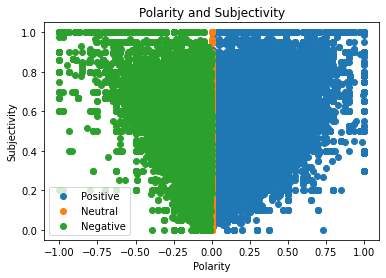

In [101]:
# Plotting the Polarity and Subjectivity

plt.figsize = (16,8)

for i in clean_df['Analysis'].unique():
  plt.scatter(clean_df[clean_df['Analysis'] == i]['Polarity'], clean_df[clean_df['Analysis'] == i]['Subjectivity'], label = i)
  
plt.title('Polarity and Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend()
plt.show()  

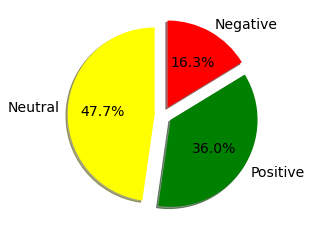

In [102]:
# Plotting a pie chart to show the percentage of positive, negative and neutral tweets

plt.figsize = (16,8)

plt.pie(clean_df['Analysis'].value_counts(), 
        labels = clean_df['Analysis'].value_counts().index, autopct = '%1.1f%%',
        shadow=True, startangle=90, explode = (0.1,0.1,0.1), colors = ['yellow','green','red'],
        textprops={'fontsize': 14});

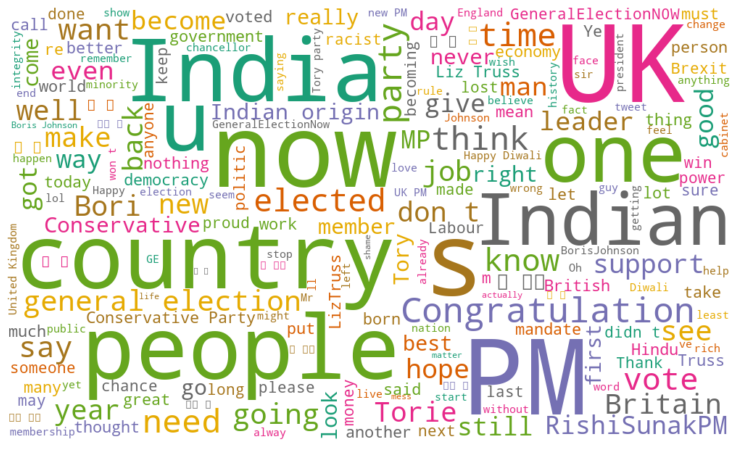

In [103]:
# Plotting the WordCloud

stopwords = ['Rishi Sunak','Prime Minister','will','amp','Rishi','Sunak','RishiSunak',
             'Prime', 'Minister'] + list(STOPWORDS)


allWords = ' '.join([twts for twts in clean_df['text']])

wordCloud = WordCloud(width = 1000, height = 600, random_state = 84, max_font_size = 150,
                   background_color='white',stopwords = stopwords,colormap='Dark2').generate(allWords)

plt.figure( figsize = (16,8))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

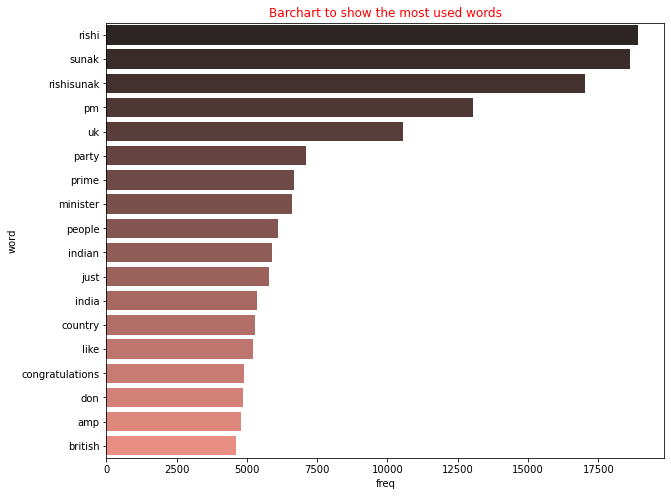

In [114]:
# Checking the Most used individual words

cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(clean_df['text'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(18), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y="word", x="freq", data=word_counter_df, palette="dark:salmon", ax=ax)
plt.title('Barchart to show the most used words',color='red')
plt.show()

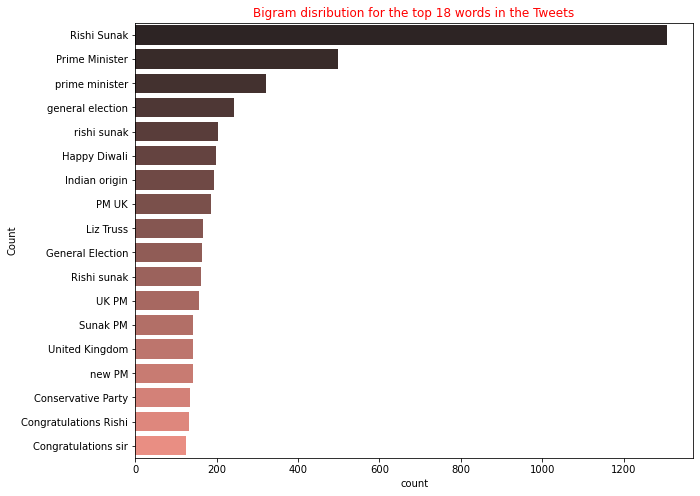

In [113]:
# Checking for Most used two words

#Converting text descriptions into vectors using TF-IDF using Bigram

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(clean_df['text'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 18 records
bigram = bigram.head(18)

#Plotting the bigram distribution

fig, ax1 = plt.subplots(figsize=(10, 8))

sns.barplot(x="count", y="bigram", data=bigram, palette="dark:salmon", ax=ax1)
plt.title("Bigram disribution for the top 18 words in the Tweets", color = 'red')
plt.ylabel('Count')
plt.show()

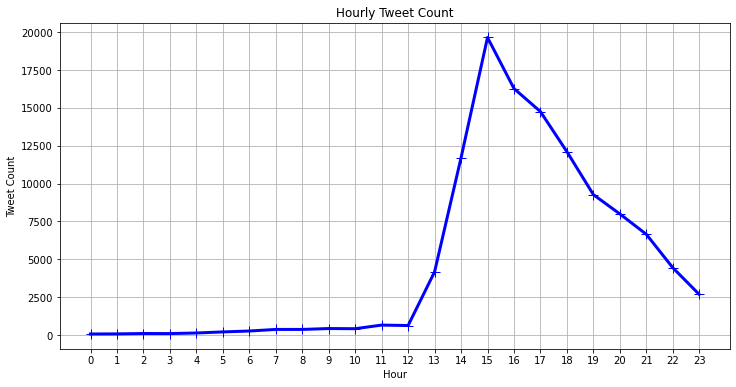

In [111]:
# Showing the distribution of the tweets per hour

clean_df['Time'] = clean_df['created_at'].dt.time

ax1 = clean_df['Time'].apply(lambda x: x.hour).value_counts().sort_index().plot(kind='line', title='Hourly Tweet Count',figsize = (12,6), color = 'blue',
                                                                          grid = True, legend = False, linewidth = 3, marker = '+', markersize = 10);
ax1.set_xticks(np.arange(0, 24, 1))
plt.xlabel('Hour')
plt.ylabel('Tweet Count')
plt.show()

**The tweet volumes started to rise after the announcement at around 13:00 and hit the pick at around 15:00. The volume of tweets started to decline after that. The sentiment analysis shows that the majority of the tweets are positive. The most common words in the tweets are: Rishi, Sunak, PM, Boris, Johnson, UK and India.**

## 8. Model Building

#### Applying Stemming

In [119]:
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

clean_df['tweet'] = clean_df['text'].apply(stemming_on_text)
clean_df['tweet'].head()

0      RishiSunak is BritishHindu of paternal Pakis...
1    RishiSunak is the richest Tory MP in history. ...
2                                           RishiSunak
3    A mountain full of money and a knowledge of pr...
4      Chance was been given as PM but didn’t fulfi...
Name: tweet, dtype: object

#### Applying Lemmatization

In [121]:
lm = nltk.stem.WordNetLemmatizer()

def lemmating_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

clean_df['tweet'] = clean_df['tweet'].apply(lemmating_on_text)
clean_df['tweet'].head()

0      RishiSunak is BritishHindu of paternal Pakis...
1    RishiSunak is the richest Tory MP in history. ...
2                                           RishiSunak
3    A mountain full of money and a knowledge of pr...
4      Chance was been given as PM but didn’t fulfi...
Name: tweet, dtype: object

#### Separating the Training and Testing Data

In [130]:
X = clean_df['text']
y = clean_df['Analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Transforming the Data using TF-IDF Vectorizer

In [131]:
vectoriser = TfidfVectorizer(max_features = 10000, ngram_range = (1,3))
vectoriser.fit(X_train)
print('Number of features: ', len(vectoriser.get_feature_names()))

Number of features:  10000


In [132]:
# Transforming the training and test data
X_train_vectorised = vectoriser.transform(X_train)
X_test_vectorised = vectoriser.transform(X_test)

In [133]:
# Creating a function to evaluate the model

from unicodedata import category


def model_evaluate(model):
    # Predicting the test set results
    y_pred = model.predict(X_test_vectorised)
    print(classification_report(y_test, y_pred))

#### Training the Model

##### Bernoulli Naive Bayes Model

In [135]:
bm = BernoulliNB()
bm.fit(X_train_vectorised, y_train)
model_evaluate(bm)
y_pred1 = bm.predict(X_test_vectorised)

              precision    recall  f1-score   support

    Negative       0.45      0.62      0.52      3668
     Neutral       0.77      0.82      0.79     10931
    Positive       0.78      0.58      0.67      8117

    accuracy                           0.70     22716
   macro avg       0.67      0.67      0.66     22716
weighted avg       0.72      0.70      0.70     22716



##### Linear SVM Model

In [136]:
sm = LinearSVC()
sm.fit(X_train_vectorised, y_train)
model_evaluate(sm)
y_pred2 = sm.predict(X_test_vectorised)

              precision    recall  f1-score   support

    Negative       0.89      0.79      0.83      3668
     Neutral       0.94      0.97      0.96     10931
    Positive       0.92      0.92      0.92      8117

    accuracy                           0.93     22716
   macro avg       0.92      0.89      0.90     22716
weighted avg       0.92      0.93      0.92     22716



# 9. Conclusion

After evaluating all the models we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned Support Vector Machine model performs better than Bernoulli Naive Bayes.

F1-score: Bernoulli Naive Bayes(accuracy = 0.70) < Support Vector Machine (accuracy =0.93)


**This implies that Support Vector Machine performs better than Bernoulli Naive Bayes**